In [25]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
import pandas as pd 
from datetime import datetime

def save_dict_to_pickle(dictionary, filename):
    with open(filename, 'wb') as file:
        pickle.dump(dictionary, file)
    print(f"Dictionary saved to {filename}")

# 2. Load a pickle file back to a Python dict
def load_dict_from_pickle(filename):
    with open(filename, 'rb') as file:
        loaded_dict = pickle.load(file)
    print(f"Dictionary loaded from {filename}")
    return loaded_dict

# folder_results = '/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v12_3m_xy16_loc16_a16_dzeta04_iter3_FLXv2'
folder_results = '/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5'

%matplotlib inline
proj = ccrs.RotatedPole(pole_longitude=-162.0, pole_latitude=39.25, central_rotated_longitude=0, globe=None)


# SMAP

In [23]:
dir_figs = os.path.join(folder_results,'figures/02_gridded_SMAP_mismatch')

grid = load_dict_from_pickle(os.path.join(dir_figs,'grid.pickle'))
results = load_dict_from_pickle(os.path.join(dir_figs,'gridded_mismatch.pickle'))

Dictionary loaded from /p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/figures/02_gridded_SMAP_mismatch/grid.pickle
Dictionary loaded from /p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/figures/02_gridded_SMAP_mismatch/gridded_mismatch.pickle


/tmp/ipykernel_32171/4140132911.py:22: RuntimeWarning: Mean of empty slice
  np.nanmean(results[i_OL]['daily_diff'][:i_val,:,:],axis=0),cmap=plt.cm.bwr,vmin=-diff_max,vmax=diff_max,
/tmp/ipykernel_32171/4140132911.py:31: RuntimeWarning: Mean of empty slice
  np.nanmean(results[i_DA]['daily_diff'][:i_val,:,:],axis=0),cmap=plt.cm.bwr,vmin=-diff_max,vmax=diff_max,
/tmp/ipykernel_32171/4140132911.py:41: RuntimeWarning: Mean of empty slice
  np.nanmean(results[i_OL]['daily_diff'][i_val:,:,:],axis=0),cmap=plt.cm.bwr,vmin=-diff_max,vmax=diff_max,
/tmp/ipykernel_32171/4140132911.py:51: RuntimeWarning: Mean of empty slice
  np.nanmean(results[i_DA]['daily_diff'][i_val:,:,:],axis=0),cmap=plt.cm.bwr,vmin=-diff_max,vmax=diff_max,


/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/figures/03_correlations/SMAP_overview_mismatch.pdf


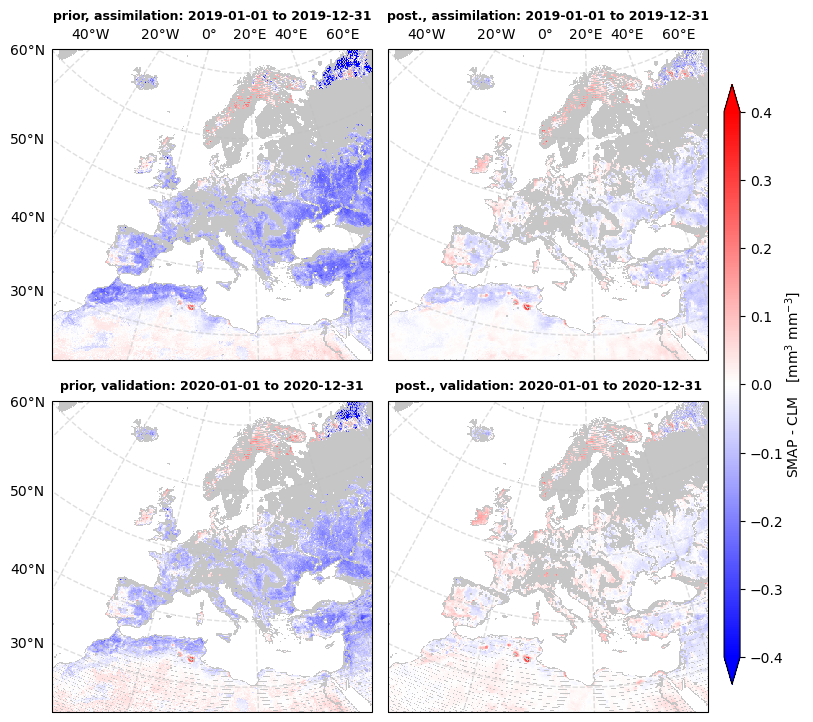

In [208]:
dates = np.array(results[0]['dates'])
date_val = pd.Timestamp(2019,8,1)
i_val = np.where(dates > date_val) [0][0]
i_OL = list(results.keys())[-1]
i_DA = list(results.keys())[0]
diff_max = .4

date_plot = [datetime(2019,1,1),datetime(2019,12,31),datetime(2020,1,1),datetime(2020,12,31)]

fig = plt.figure(figsize=(8,8))
# fig.subplots_adjust(right=0.9,top=0.9)

ax1 = fig.add_axes([0.06, 0.5, 0.4, 0.4],projection=proj)
ax2 = fig.add_axes([0.48, 0.5, 0.4, 0.4],projection=proj)
ax3 = fig.add_axes([0.06, 0.06, 0.4, 0.4],projection=proj)
ax4 = fig.add_axes([0.48, 0.06, 0.4, 0.4],projection=proj)
cax = fig.add_axes([0.9, 0.1, 0.02, 0.75])


ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
cmesh = ax1.pcolormesh(grid['lon_c'],grid['lat_c'],
               np.nanmean(results[i_OL]['daily_diff'][:i_val,:,:],axis=0),cmap=plt.cm.bwr,vmin=-diff_max,vmax=diff_max,
              transform=ccrs.PlateCarree())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
ax1.set_title('prior, assimilation: %s to %s' % (str(date_plot[0])[0:10],str(date_plot[1])[0:10]),weight="bold",fontsize=9)

ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
cmesh = ax2.pcolormesh(grid['lon_c'],grid['lat_c'],
               np.nanmean(results[i_DA]['daily_diff'][:i_val,:,:],axis=0),cmap=plt.cm.bwr,vmin=-diff_max,vmax=diff_max,
              transform=ccrs.PlateCarree())
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title('post., assimilation: %s to %s' % (str(date_plot[0])[0:10],str(date_plot[1])[0:10]),weight="bold",fontsize=9)

ax3.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
cmesh = ax3.pcolormesh(grid['lon_c'],grid['lat_c'],
               np.nanmean(results[i_OL]['daily_diff'][i_val:,:,:],axis=0),cmap=plt.cm.bwr,vmin=-diff_max,vmax=diff_max,
              transform=ccrs.PlateCarree())
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl3.top_labels=False
gl3.bottom_labels = False
gl3.right_labels=False
ax3.set_title('prior, validation: %s to %s' % (str(date_plot[2])[0:10],str(date_plot[3])[0:10]),weight="bold",fontsize=9,y=1.01)

ax4.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
cmesh = ax4.pcolormesh(grid['lon_c'],grid['lat_c'],
               np.nanmean(results[i_DA]['daily_diff'][i_val:,:,:],axis=0),cmap=plt.cm.bwr,vmin=-diff_max,vmax=diff_max,
              transform=ccrs.PlateCarree())
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=False)
ax4.set_title('post., validation: %s to %s' % (str(date_plot[2])[0:10],str(date_plot[3])[0:10]),weight="bold",fontsize=9,y=1.01)

# gl4.left_labels=False
# gl4.bottom_labels = False
# gl4.right_labels=False

cbar = plt.colorbar(cmesh,extend='both',cax=cax)
cbar.set_label(r'SMAP - CLM   [mm$^3$ mm$^{-3}$]',labelpad=0)

# fig.savefig(os.path.join(dir_figs,'SMAP_overview_mismatch.png') )
# fig.savefig(os.path.join(dir_figs,'SMAP_overview_mismatch.pdf') )
print(os.path.join(dir_figs,'SMAP_overview_mismatch.pdf'))
# fig.suptitle('Mean soil moisture difference SMAP and CLM')



In [36]:
np.linspace(-0.45,0.45,10)

array([-0.45, -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,  0.35,
        0.45])

/tmp/ipykernel_32171/4221739316.py:37: RuntimeWarning: Mean of empty slice
  qtt1 = -np.nanmean(results[i_OL]['daily_diff'][:i_val,:,:],axis=0)
/tmp/ipykernel_32171/4221739316.py:39: RuntimeWarning: Mean of empty slice
  qtt1_c = np.nanmean( qtt1.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))
/tmp/ipykernel_32171/4221739316.py:49: RuntimeWarning: Mean of empty slice
  qtt2 = -np.nanmean(results[i_DA]['daily_diff'][:i_val,:,:],axis=0)
/tmp/ipykernel_32171/4221739316.py:51: RuntimeWarning: Mean of empty slice
  qtt2_c = np.nanmean( qtt2.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))
/tmp/ipykernel_32171/4221739316.py:61: RuntimeWarning: Mean of empty slice
  qtt3 = -np.nanmean(results[i_OL]['daily_diff'][i_val:,:,:],axis=0)
/tmp/ipykernel_32171/4221739316.py:63: RuntimeWarning: Mean of empty slice
  qtt3_c = np.nanmean( qtt3.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))
/tmp/ipykernel_32171/4221739316.py:73: RuntimeWarning: Mean of empty slice
  qtt4 = -np.nanmean(results[i_DA]['daily_diff

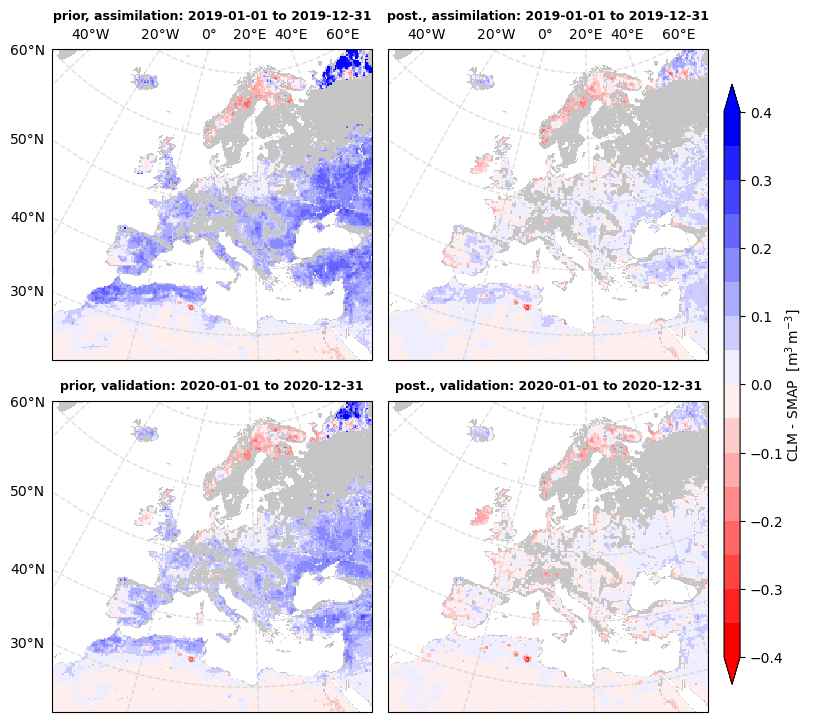

In [209]:
### Coarsened versuib to increase visibility/avoid aliasing
import matplotlib as mpl
diff_max = .4
vals_select = np.linspace(-0.4,0.4,17)
cmap = plt.cm.bwr_r
norm = mpl.colors.BoundaryNorm(vals_select, cmap.N)


lat_c_c = grid['lat_c'][0::2,0::2]
lon_c_c = grid['lon_c'][0::2,0::2]
# bg = grid['background']
# rows, cols = bg.shape
# bg_c = bg.reshape(rows//2, 2, cols//2, 2).max(axis=(1,-1))


dates = np.array(results[0]['dates'])
date_val = pd.Timestamp(2019,8,1)
i_val = np.where(dates > date_val) [0][0]
i_OL = list(results.keys())[-1]
i_DA = list(results.keys())[0]

%matplotlib inline
proj = ccrs.RotatedPole(pole_longitude=-162.0, pole_latitude=39.25, central_rotated_longitude=0, globe=None)

fig = plt.figure(figsize=(8,8))
# fig.subplots_adjust(right=0.9,top=0.9)

ax1 = fig.add_axes([0.06, 0.5, 0.4, 0.4],projection=proj)
ax2 = fig.add_axes([0.48, 0.5, 0.4, 0.4],projection=proj)
ax3 = fig.add_axes([0.06, 0.06, 0.4, 0.4],projection=proj)
ax4 = fig.add_axes([0.48, 0.06, 0.4, 0.4],projection=proj)
cax = fig.add_axes([0.9, 0.1, 0.02, 0.75])


ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())

qtt1 = -np.nanmean(results[i_OL]['daily_diff'][:i_val,:,:],axis=0)
rows, cols = qtt1.shape
qtt1_c = np.nanmean( qtt1.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))
cmesh = ax1.pcolormesh(lon_c_c,lat_c_c,qtt1_c,norm=norm,
              transform=ccrs.PlateCarree(),cmap=cmap)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
ax1.set_title('prior, assimilation: %s to %s' % (str(date_plot[0])[0:10],str(date_plot[1])[0:10]),weight="bold",fontsize=9)

ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
qtt2 = -np.nanmean(results[i_DA]['daily_diff'][:i_val,:,:],axis=0)
rows, cols = qtt2.shape
qtt2_c = np.nanmean( qtt2.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))
cmesh2 = ax2.pcolormesh(lon_c_c,lat_c_c,qtt2_c,norm=norm,cmap=cmap,
              transform=ccrs.PlateCarree())
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title('post., assimilation: %s to %s' % (str(date_plot[0])[0:10],str(date_plot[1])[0:10]),weight="bold",fontsize=9)

ax3.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
qtt3 = -np.nanmean(results[i_OL]['daily_diff'][i_val:,:,:],axis=0)
rows, cols = qtt3.shape
qtt3_c = np.nanmean( qtt3.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))
cmesh3 = ax3.pcolormesh(lon_c_c,lat_c_c,qtt3_c,norm=norm,cmap=cmap,
              transform=ccrs.PlateCarree())
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl3.top_labels=False
gl3.bottom_labels = False
gl3.right_labels=False
ax3.set_title('prior, validation: %s to %s' % (str(date_plot[2])[0:10],str(date_plot[3])[0:10]),weight="bold",fontsize=9,y=1.01)

ax4.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
qtt4 = -np.nanmean(results[i_DA]['daily_diff'][i_val:,:,:],axis=0)
rows, cols = qtt4.shape
qtt4_c = np.nanmean( qtt4.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))
cmesh4 = ax4.pcolormesh(lon_c_c,lat_c_c,qtt4_c,norm=norm,cmap=cmap,
              transform=ccrs.PlateCarree())
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=False)
ax4.set_title('post., validation: %s to %s' % (str(date_plot[2])[0:10],str(date_plot[3])[0:10]),weight="bold",fontsize=9,y=1.01)

# gl4.left_labels=False
# gl4.bottom_labels = False
# gl4.right_labels=False

cbar = plt.colorbar(cmesh,extend='both',cax=cax)
cbar.set_label(r'CLM - SMAP  [m$^3\,$m$^{-3}$]',labelpad=0)

fig.savefig(os.path.join(dir_figs,'SMAP_overview_mismatch_v2.png') )
fig.savefig(os.path.join(dir_figs,'SMAP_overview_mismatch_v2.pdf') )

In [49]:
np.around(np.max(all_rmse_OL),decimals=1) - np.around(np.min(all_rmse_OL),decimals=1)


1.0

# FLX

Dictionary loaded from /p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/figures/03_correlations/grid.pickle
Dictionary loaded from /p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/figures/03_correlations/plot_03_ICOS_stats_per_station.pickle


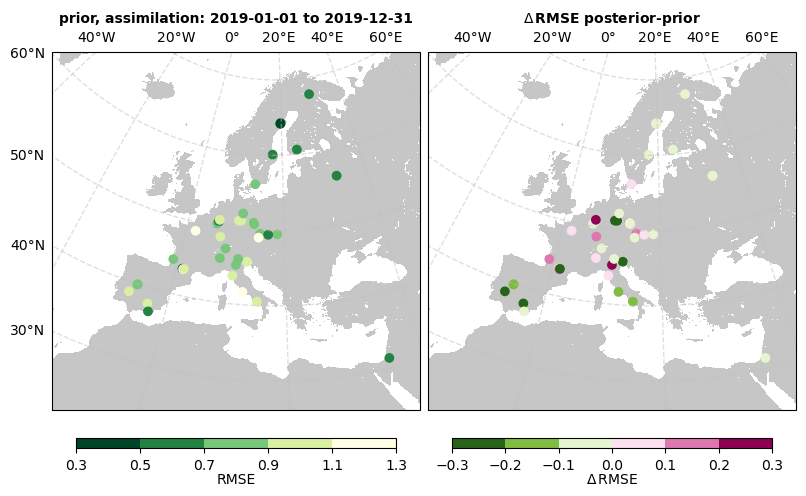

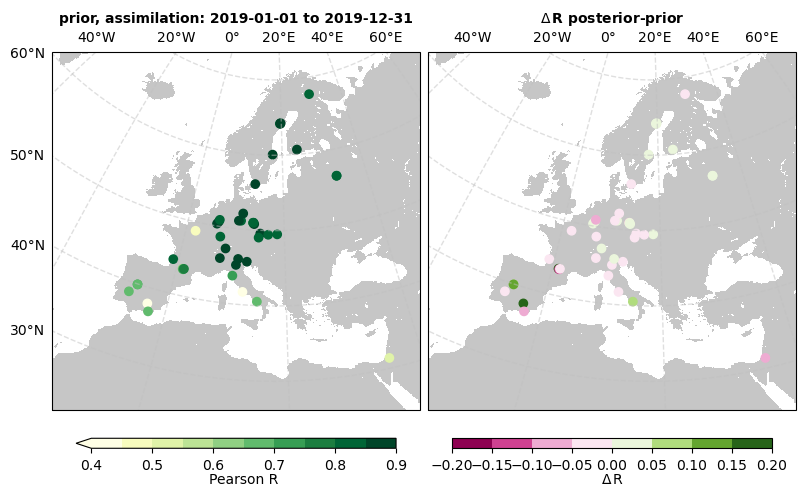

In [210]:
dir_figs = os.path.join(folder_results,'figures/03_correlations')
grid = load_dict_from_pickle(os.path.join(dir_figs,'grid.pickle'))

stats_per_station = load_dict_from_pickle(os.path.join(dir_figs, 'plot_03_ICOS_stats_per_station.pickle'))

date_start = stats_per_station['date_start']
date_val = stats_per_station['date_val']
date_end = stats_per_station['date_end']

mode_ = 'train'
str_prior = 'prior'
str_post = 'post.'

all_rmse_OL = np.array([stats_per_station[mode_][str_prior][station_]['rmse'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_rmse_DA = np.array([stats_per_station[mode_][str_post][station_]['rmse'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_lat_OL = np.array([stats_per_station[mode_][str_prior][station_]['lat'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_lon_OL = np.array([stats_per_station[mode_][str_prior][station_]['lon'] for station_ in stats_per_station[mode_][str_prior].keys()])

all_R_OL = np.array([stats_per_station[mode_][str_prior][station_]['R'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_R_DA = np.array([stats_per_station[mode_][str_post][station_]['R'] for station_ in stats_per_station[mode_][str_prior].keys()])

all_b_OL = np.array([stats_per_station[mode_][str_prior][station_]['bias'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_b_DA = np.array([stats_per_station[mode_][str_post][station_]['bias'] for station_ in stats_per_station[mode_][str_prior].keys()])




diff = all_rmse_DA - all_rmse_OL
maxval = np.max(np.abs(diff))

cmap1 = plt.cm.YlGn_r
min_ = np.around(np.min(all_rmse_OL),decimals=1)
max_ = np.around(np.max(all_rmse_OL),decimals=1)
n_ = int((max_ - min_)*5)+1
norm1 = mpl.colors.BoundaryNorm( np.linspace(min_,max_,n_), cmap.N)

cmap2 = plt.cm.PiYG_r
min_ = np.around(np.min(diff),decimals=1)
max_ = np.around(np.max(diff),decimals=1)
n_ = int((max_ - min_)*10)+1
norm2 = mpl.colors.BoundaryNorm( np.linspace(min_,max_,n_), cmap.N)


fig = plt.figure(figsize=(8,5))
# fig.subplots_adjust(right=0.9,top=0.9)

ax1 = fig.add_axes([0.06, 0.06, 0.46, 0.95],projection=proj)
ax2 = fig.add_axes([0.53, 0.06, 0.46, 0.95],projection=proj)
cax1 = fig.add_axes([0.09, 0.1, 0.4, 0.02])
cax2 = fig.add_axes([0.56, 0.1, 0.4, 0.02])

vmax1 = 1.3
ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
# scat1 = ax1.scatter(all_lon_OL,all_lat_OL,c=all_rmse_OL,vmax=vmax1,cmap=plt.cm.YlGn_r,transform=ccrs.PlateCarree())
scat1 = ax1.scatter(all_lon_OL,all_lat_OL,c=all_rmse_OL,cmap=cmap1,norm=norm1,transform=ccrs.PlateCarree())

cbar = plt.colorbar(scat1,cax=cax1,orientation='horizontal')
cbar.set_label(r'RMSE',labelpad=0)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
ax1.set_title('prior, assimilation: %s to %s' % (str(date_plot[0])[0:10],str(date_plot[1])[0:10]),weight="bold",fontsize=10)

ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
scat2 = ax2.scatter(all_lon_OL,all_lat_OL,c=diff,cmap=cmap2,norm=norm2,transform=ccrs.PlateCarree())
cbar2 = plt.colorbar(scat2,cax=cax2,orientation='horizontal')
cbar2.set_label(r'$\Delta \,$RMSE',labelpad=0)

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title(r'$\Delta \,$RMSE posterior-prior' ,weight="bold",fontsize=10)

fig.savefig(os.path.join(dir_figs,'ICOS_RMSE_train.png') )
fig.savefig(os.path.join(dir_figs,'ICOS_RMSE_train.pdf') )



diff = all_R_DA - all_R_OL
maxval = np.max(np.abs(diff))

cmap3 = plt.cm.YlGn
min_ = 0.4
max_ = np.around(np.max(all_R_OL),decimals=1)
n_ = int((max_ - min_)*20)+1
norm3 = mpl.colors.BoundaryNorm( np.linspace(min_,max_,n_), cmap.N)

cmap4 = plt.cm.PiYG
# min_ = np.around(np.min(diff),decimals=1)
max_ = np.around(np.max(np.abs(diff)),decimals=1)
n_ = int((max_ - (-max_))*20)+1
norm4 = mpl.colors.BoundaryNorm( np.linspace(-max_,max_,n_), cmap.N)

fig = plt.figure(figsize=(8,5))
# fig.subplots_adjust(right=0.9,top=0.9)

ax1 = fig.add_axes([0.06, 0.06, 0.46, 0.95],projection=proj)
ax2 = fig.add_axes([0.53, 0.06, 0.46, 0.95],projection=proj)
cax1 = fig.add_axes([0.09, 0.1, 0.4, 0.02])
cax2 = fig.add_axes([0.56, 0.1, 0.4, 0.02])

ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
scat1 = ax1.scatter(all_lon_OL,all_lat_OL,c=all_R_OL,cmap=cmap3,norm=norm3,transform=ccrs.PlateCarree())
    
cbar = plt.colorbar(scat1,cax=cax1,orientation='horizontal',extend='min')
cbar.set_label(r'Pearson R',labelpad=0)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
ax1.set_title('prior, assimilation: %s to %s' % (str(date_plot[0])[0:10],str(date_plot[1])[0:10]),weight="bold",fontsize=10)

ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
scat2 = ax2.scatter(all_lon_OL,all_lat_OL,c=diff,cmap=cmap4,norm=norm4,transform=ccrs.PlateCarree())
cbar2 = plt.colorbar(scat2,cax=cax2,orientation='horizontal')
cbar2.set_label(r'$\Delta \,$R',labelpad=0)

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title(r'$\Delta \,$R posterior-prior' ,weight="bold",fontsize=10)

fig.savefig(os.path.join(dir_figs,'ICOS_R_train.png') )
fig.savefig(os.path.join(dir_figs,'ICOS_R_train.pdf') )

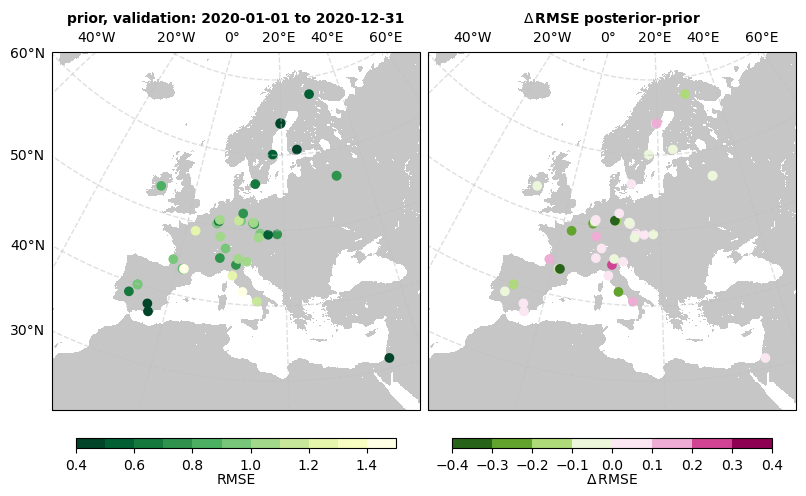

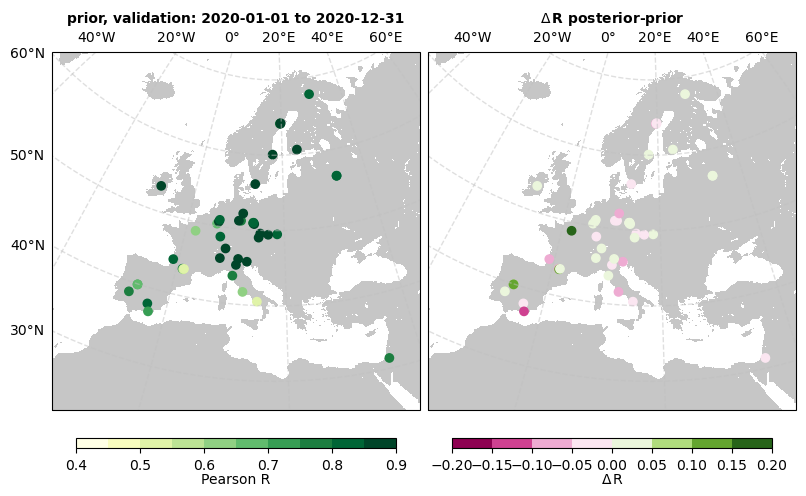

In [83]:
mode_ = 'val'
str_prior = 'prior'
str_post = 'post.'

all_rmse_OL = np.array([stats_per_station[mode_][str_prior][station_]['rmse'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_rmse_DA = np.array([stats_per_station[mode_][str_post][station_]['rmse'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_lat_OL = np.array([stats_per_station[mode_][str_prior][station_]['lat'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_lon_OL = np.array([stats_per_station[mode_][str_prior][station_]['lon'] for station_ in stats_per_station[mode_][str_prior].keys()])

all_R_OL = np.array([stats_per_station[mode_][str_prior][station_]['R'] for station_ in stats_per_station[mode_][str_prior].keys()])
all_R_DA = np.array([stats_per_station[mode_][str_post][station_]['R'] for station_ in stats_per_station[mode_][str_prior].keys()])

diff = all_rmse_DA - all_rmse_OL
maxval = np.max(np.abs(diff))



cmap1 = plt.cm.YlGn_r
min_ = np.around(np.min(all_rmse_OL),decimals=1)
max_ = np.around(np.max(all_rmse_OL),decimals=1)
n_ = int((max_ - min_)*10)+1
norm1 = mpl.colors.BoundaryNorm( np.linspace(min_,max_,n_), cmap.N)

cmap2 = plt.cm.PiYG_r
# min_ = np.around(np.min(diff),decimals=1)
max_ = np.around(np.max(np.abs(diff)),decimals=1)
n_ = int((max_ - (-max_))*10)+1
norm2 = mpl.colors.BoundaryNorm( np.linspace(-max_,max_,n_), cmap.N)

fig = plt.figure(figsize=(8,5))
# fig.subplots_adjust(right=0.9,top=0.9)

ax1 = fig.add_axes([0.06, 0.06, 0.46, 0.95],projection=proj)
ax2 = fig.add_axes([0.53, 0.06, 0.46, 0.95],projection=proj)
cax1 = fig.add_axes([0.09, 0.1, 0.4, 0.02])
cax2 = fig.add_axes([0.56, 0.1, 0.4, 0.02])

ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
scat1 = ax1.scatter(all_lon_OL,all_lat_OL,c=all_rmse_OL,cmap=cmap1,norm=norm1,transform=ccrs.PlateCarree())
    
cbar = plt.colorbar(scat1,cax=cax1,orientation='horizontal')
cbar.set_label(r'RMSE',labelpad=0)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
# ax1.set_title('OL validation: %s to %s' % (str(dates[0])[0:10],str(dates[i_val-1])[0:10]),weight="bold",fontsize=10)
ax1.set_title('prior, validation: %s to %s' % (str(date_plot[2])[0:10],str(date_plot[3])[0:10]),weight="bold",fontsize=10)
# ax1.set_title('prior, training: %s to %s' % (str(date_plot[2])[0:10],str(date_plot[3])[0:10]),weight="bold",fontsize=10)

ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
scat2 = ax2.scatter(all_lon_OL,all_lat_OL,c=diff,cmap=cmap2,norm=norm2,transform=ccrs.PlateCarree())
cbar2 = plt.colorbar(scat2,cax=cax2,orientation='horizontal')
cbar2.set_label(r'$\Delta \,$RMSE',labelpad=0)

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title(r'$\Delta \,$RMSE posterior-prior' ,weight="bold",fontsize=10)

fig.savefig(os.path.join(dir_figs,'ICOS_RMSE_val.png') )
fig.savefig(os.path.join(dir_figs,'ICOS_RMSE_val.pdf') )



diff = all_R_DA - all_R_OL
maxval = np.max(np.abs(diff))

cmap3 = plt.cm.YlGn
min_ = 0.4
max_ = np.around(np.max(all_R_OL),decimals=1)
n_ = int((max_ - min_)*20)+1
norm3 = mpl.colors.BoundaryNorm( np.linspace(min_,max_,n_), cmap.N)

cmap4 = plt.cm.PiYG
# min_ = np.around(np.min(diff),decimals=1)
max_ = np.around(np.max(np.abs(diff)),decimals=1)
n_ = int((max_ - (-max_))*20)+1
norm4 = mpl.colors.BoundaryNorm( np.linspace(-max_,max_,n_), cmap.N)


fig = plt.figure(figsize=(8,5))
# fig.subplots_adjust(right=0.9,top=0.9)

ax1 = fig.add_axes([0.06, 0.06, 0.46, 0.95],projection=proj)
ax2 = fig.add_axes([0.53, 0.06, 0.46, 0.95],projection=proj)
cax1 = fig.add_axes([0.09, 0.1, 0.4, 0.02])
cax2 = fig.add_axes([0.56, 0.1, 0.4, 0.02])

ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
scat1 = ax1.scatter(all_lon_OL,all_lat_OL,c=all_R_OL,cmap=cmap3,norm=norm3,transform=ccrs.PlateCarree())
    
cbar = plt.colorbar(scat1,cax=cax1,orientation='horizontal')
cbar.set_label(r'Pearson R',labelpad=0)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
ax1.set_title('prior, validation: %s to %s' % (str(date_plot[2])[0:10],str(date_plot[3])[0:10]),weight="bold",fontsize=10)

ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
scat2 = ax2.scatter(all_lon_OL,all_lat_OL,c=diff,cmap=cmap4,norm=norm4,transform=ccrs.PlateCarree())
cbar2 = plt.colorbar(scat2,cax=cax2,orientation='horizontal')
cbar2.set_label(r'$\Delta \,$R',labelpad=0)

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title(r'$\Delta \,$R posterior-prior' ,weight="bold",fontsize=10)

fig.savefig(os.path.join(dir_figs,'ICOS_R_val.png') )
fig.savefig(os.path.join(dir_figs,'ICOS_R_val.pdf') )

Text(0.5, 1.0, 'posterior, training')

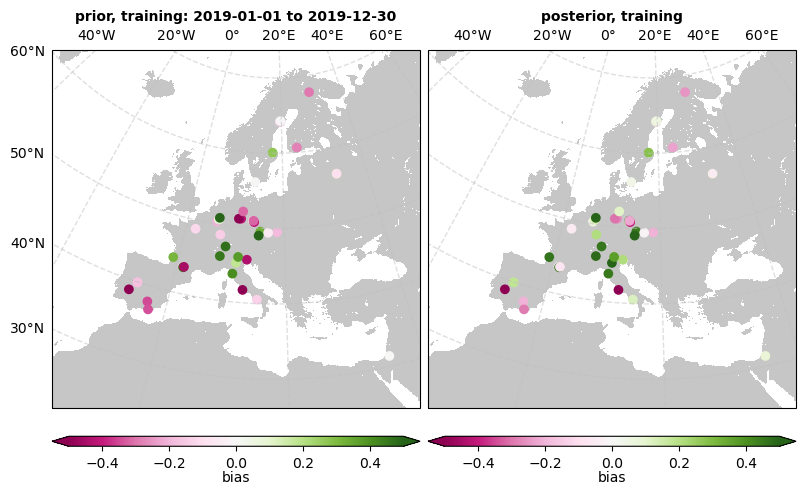

In [20]:
# diff = all_b_DA - all_b_OL
# maxval = np.max(np.abs(diff))

# fig = plt.figure(figsize=(8,5))
# # fig.subplots_adjust(right=0.9,top=0.9)

# ax1 = fig.add_axes([0.06, 0.06, 0.46, 0.95],projection=proj)
# ax2 = fig.add_axes([0.53, 0.06, 0.46, 0.95],projection=proj)
# cax1 = fig.add_axes([0.06, 0.1, 0.46, 0.02])
# cax2 = fig.add_axes([0.53, 0.1, 0.46, 0.02])
# maxval=.5
# ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
# scat1 = ax1.scatter(all_lon_OL,all_lat_OL,c=all_b_OL,cmap=plt.cm.PiYG,vmin=-maxval,vmax=maxval,transform=ccrs.PlateCarree()) #vmin=.4,
    
# cbar = plt.colorbar(scat1,cax=cax1,orientation='horizontal',extend='both')
# cbar.set_label(r'bias',labelpad=0)

# gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
# gl.right_labels=False
# gl.bottom_labels = False
# ax1.set_title('prior, training: %s to %s' % (str(date_start)[0:10],str(date_val)[0:10]),weight="bold",fontsize=10)

# ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
# scat2 = ax2.scatter(all_lon_OL,all_lat_OL,c=all_b_DA,cmap=plt.cm.PiYG,vmin=-maxval,vmax=maxval,transform=ccrs.PlateCarree()) #vmin=.4,
    
# cbar2 = plt.colorbar(scat2,cax=cax2,orientation='horizontal',extend='both')
# cbar2.set_label(r'bias',labelpad=0)

# gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)

# gl2.left_labels=False
# gl2.bottom_labels = False
# gl2.right_labels=False
# ax2.set_title('posterior, training' ,weight="bold",fontsize=10)


In [84]:
stats_per_station.keys()

dict_keys(['train', 'val', 'date_start', 'date_val', 'date_end'])

# SMAP+FLX

/tmp/ipykernel_32171/1802579308.py:11: RuntimeWarning: All-NaN slice encountered
  mask = np.nanmax( qtt.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))


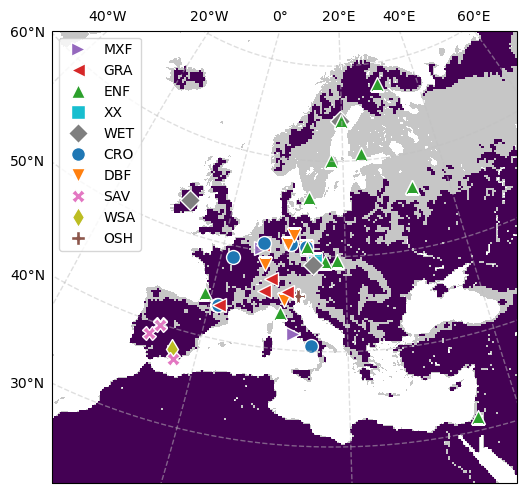

In [87]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection=proj)


ax.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())

qtt_ = (np.isnan(results[i_OL]['daily_diff'][:i_val,:,:]).astype(int) == 0).astype(int).sum(axis=0)
qtt = np.nan*np.zeros(qtt_.shape)
qtt[qtt_ > 0] = 1
rows, cols = qtt.shape
mask = np.nanmax( qtt.reshape(rows//2, 2, cols//2, 2), axis=(1,-1))
cmesh = ax.pcolormesh(lon_c_c,lat_c_c,mask,cmap=plt.cm.viridis,
              transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False


covers_unique = np.array(['CRO', 'DBF', 'ENF', 'GRA', 'MXF', 'OSH', 'SAV', 'WET', 'WSA', 'XX'])
cmap = plt.cm.tab10
markers = ["o", "v", "^", "<", ">", "P", "X", "D", "d", "s", "p", "1", "2", "3", "4", "s", "*", "h", "H", "x" ]

covers_seen = []
# handles = []
# labels = []
for station_ in stats_per_station['val']['prior'].keys():
    cover = stats_per_station['val']['prior'][station_]['cover']
    i_cover = np.where(cover==covers_unique)[0][0]
    
    if not cover in covers_seen:
        label_ = cover
        covers_seen.append(cover)
        # save_handle= True
    else:
        label_ = None
        # save_handle = False

    msize = 10
    # ax.plot(stats_per_station['train']['OL'][station_]['lon'],stats_per_station['train']['OL'][station_]['lat'],
    #         markers[i_cover],markersize=msize+2,color='white',transform=ccrs.PlateCarree())
    plt_ = ax.plot(stats_per_station['val']['prior'][station_]['lon'],stats_per_station['val']['prior'][station_]['lat'],
                markers[i_cover],markersize=msize,markeredgewidth=1,markeredgecolor='w',
                   label=label_,color=cmap(i_cover),transform=ccrs.PlateCarree())
    
    # if save_handle:
    #     handles.append(plt_)
    #     labels.append(label_)
   
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels,loc='upper left')

fig.savefig(os.path.join(dir_figs,'obs_overview.png') )
fig.savefig(os.path.join(dir_figs,'obs_overview.pdf') )

# Precipitation

In [7]:
proj

<Derived Geographic 2D CRS: +proj=ob_tran +ellps=WGS84 +a=6378137.0 +o_proj=la ...>
Name: unnamed
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ ob_tran o_proj=latlon
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

0
1
2
3
4
5
6
7
8
9
10
11


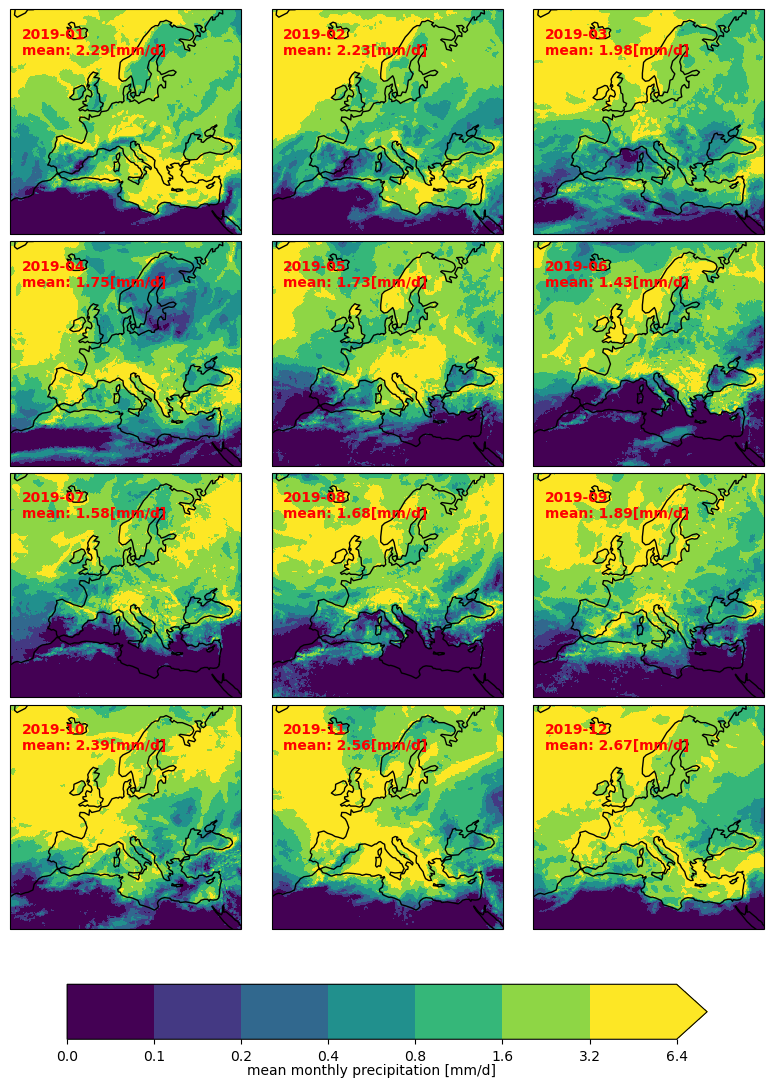

In [17]:
from glob import glob
import xarray as xr
import matplotlib as mpl

files_ERA5 = sorted(glob('/p/scratch/cjibg36/kaandorp2/data/ERA5_EUR-11_CLM_v2/2019-[0-9][0-9].nc'))

cmap = plt.cm.YlGnBu
norm = mpl.colors.BoundaryNorm(np.array([0,0.1,0.2,0.4,0.8,1.6,3.2,6.4]), cmap.N)

fig, axes = plt.subplots(nrows=4, ncols=3,sharex=True,sharey=True,figsize=(8,11),subplot_kw={'projection': proj})
for i1,ax in enumerate(axes.flat):
    data = xr.open_dataset(files_ERA5[i1])
    prect_mean = data.PRECTmms.mean(axis=0)*(60*60*24)
    prect_mean_mean = prect_mean.mean()
    im = ax.pcolormesh(grid['lon_c'],grid['lat_c'],data.PRECTmms.mean(axis=0)*(60*60*24),norm=norm,transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.text(0.05,0.8,str(data.time.values[0])[0:7]+'\nmean: %2.2f[mm/d]'%prect_mean_mean,transform=ax.transAxes,color='r',weight="bold")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    print(i1)
fig.tight_layout()

fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.05])
cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal',extend='max')
cbar.set_label(r'mean monthly precipitation [mm/d]',labelpad=0)

fig.savefig('ERA5_precip.png')
fig.savefig('ERA5_precip.pdf')

# Soil texture

In [89]:
import xarray as xr

In [145]:
folder_results

'/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5'

In [160]:
dir_figs_texture = os.path.join(folder_results,'figures/04_texture')
if not os.path.exists(dir_figs_texture):
    print('making %s' % dir_figs_texture)
    os.makedirs(dir_figs_texture)

surffile_prior = xr.load_dataset('/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/20190101-20191230/i005/R063/surfdata_EUR-11_hist_16pfts_Irrig_CMIP6_simyr2000_c230808_GLC2000.nc')
surffile_5iter = xr.open_dataset('/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/20190101-20191230/i005/R000/surfdata_EUR-11_hist_16pfts_Irrig_CMIP6_simyr2000_c230808_GLC2000.nc')
surffile_3iter = xr.open_dataset('/p/largedata/jibg36/kaandorp2/run_data/DA_eCLM_cordex_444x432_v14_1y_iter3/20190101-20191230/i003/R000/surfdata_EUR-11_hist_16pfts_Irrig_CMIP6_simyr2000_c230808_GLC2000.nc')
surffile_1iter = xr.open_dataset('/p/largedata/jibg36/kaandorp2/run_data/DA_eCLM_cordex_444x432_v14_1y_iter1/20190101-20191230/i001/R000/surfdata_EUR-11_hist_16pfts_Irrig_CMIP6_simyr2000_c230808_GLC2000.nc')
surffile_7iter = xr.open_dataset('/p/largedata/jibg36/kaandorp2/run_data/DA_eCLM_cordex_444x432_v14_1y_iter7/20190101-20191230/i007/R000/surfdata_EUR-11_hist_16pfts_Irrig_CMIP6_simyr2000_c230808_GLC2000.nc')

In [154]:
surffile_prior['ORGANIC']

<xarray.DataArray 'ORGANIC' (nlevsoi: 10, lsmlat: 432, lsmlon: 444)>
array([[[  7.16790867,   7.16790867,   7.16790867, ...,   0.        ,
           0.        ,   0.        ],
        [  7.16790867,   7.16790867,   7.16790867, ...,   0.        ,
           0.        ,   0.        ],
        [  7.16790867,   7.16790867,   7.16790867, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ..., 130.        ,
         130.        , 130.        ],
        [  0.        ,   0.        ,   0.        , ..., 130.        ,
         130.        , 130.        ],
        [  0.        ,   0.        ,   0.        , ..., 130.        ,
         130.        , 130.        ]],

       [[  7.30367041,   7.30367041,   7.30367041, ...,   0.        ,
           0.        ,   0.        ],
        [  7.30367041,   7.30367041,   7.30367041, ...,   0.        ,
           0.        ,   0.        ],
        [  7.30367041,   7.30367041,   7.30367041, ...,   0.        ,
           0.        ,   0.        ],
...
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]])
Dimensions without coordinates: nlevsoi, lsmlat, lsmlon

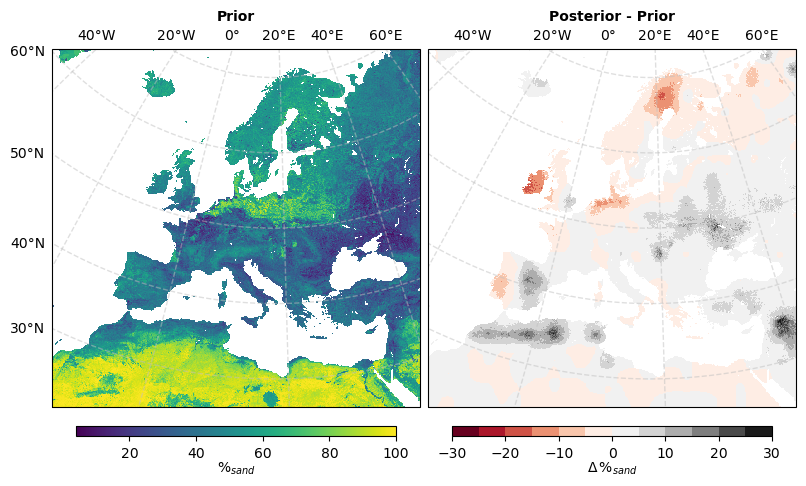

In [181]:
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_axes([0.06, 0.07, 0.46, 0.95],projection=proj)
ax2 = fig.add_axes([0.53, 0.07, 0.46, 0.95],projection=proj)
cax1 = fig.add_axes([0.09, 0.13, 0.4, 0.02])
cax2 = fig.add_axes([0.56, 0.13, 0.4, 0.02])

ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
pct_sand = surffile_prior['PCT_SAND'][0,:,:].values
pct_sand[~grid['background']] = np.nan
cmesh1 = ax1.pcolormesh(grid['lon_c'],grid['lat_c'],
               pct_sand,cmap=plt.cm.viridis,
              transform=ccrs.PlateCarree())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
ax1.set_title('Prior',weight="bold",fontsize=10)

cbar1 = plt.colorbar(cmesh1,cax=cax1,orientation='horizontal')
cbar1.set_label('%$_{sand}$',labelpad=0)


ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
pct_sand2 = surffile_5iter['PCT_SAND'][0,:,:].values
pct_sand2[~grid['background']] = np.nan
delta_sand = pct_sand2-pct_sand

cmap=plt.cm.RdGy
max_ = 30#int(np.nanmax(np.abs(delta_sand)))
n_ = 12+1
norm = mpl.colors.BoundaryNorm( np.linspace(-max_,max_,n_), cmap.N)

# vmax = np.nanmax(np.abs(delta_sand))
cmesh2 = ax2.pcolormesh(grid['lon_c'],grid['lat_c'],
               delta_sand,cmap=cmap,norm=norm,
              transform=ccrs.PlateCarree())
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title('Posterior - Prior',weight="bold",fontsize=10)

cbar2 = plt.colorbar(cmesh2,cax=cax2,orientation='horizontal')
cbar2.set_label('$\Delta\,$%$_{sand}$',labelpad=0)

fig.savefig(os.path.join(dir_figs_texture,'texture_sand.png'))
fig.savefig(os.path.join(dir_figs_texture,'texture_sand.pdf'))


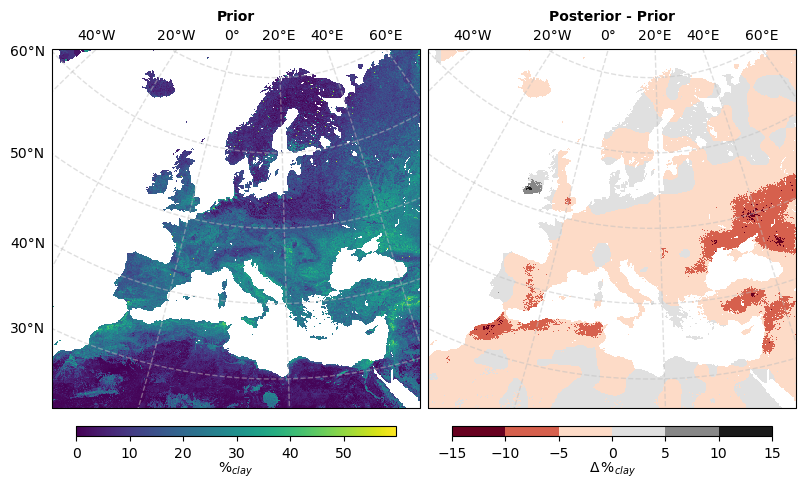

In [184]:
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_axes([0.06, 0.07, 0.46, 0.95],projection=proj)
ax2 = fig.add_axes([0.53, 0.07, 0.46, 0.95],projection=proj)
cax1 = fig.add_axes([0.09, 0.13, 0.4, 0.02])
cax2 = fig.add_axes([0.56, 0.13, 0.4, 0.02])


ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
pct_clay = surffile_prior['PCT_CLAY'][0,:,:].values
pct_clay[~grid['background']] = np.nan
cmesh1 = ax1.pcolormesh(grid['lon_c'],grid['lat_c'],
               pct_clay,cmap=plt.cm.viridis,
              transform=ccrs.PlateCarree())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
ax1.set_title('Prior',weight="bold",fontsize=10)

cbar1 = plt.colorbar(cmesh1,cax=cax1,orientation='horizontal')
cbar1.set_label('%$_{clay}$',labelpad=0)


ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
pct_clay2 = surffile_5iter['PCT_CLAY'][0,:,:].values
pct_clay2[~grid['background']] = np.nan
delta_clay = pct_clay2-pct_clay

cmap=plt.cm.RdGy
max_ = 15#int(np.nanmax(np.abs(delta_sand)))
n_ = 6+1
norm = mpl.colors.BoundaryNorm( np.linspace(-max_,max_,n_), cmap.N)

# vmax = np.nanmax(np.abs(delta_sand))
cmesh2 = ax2.pcolormesh(grid['lon_c'],grid['lat_c'],
               delta_clay,cmap=cmap,norm=norm,
              transform=ccrs.PlateCarree())
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title('Posterior - Prior',weight="bold",fontsize=10)

cbar2 = plt.colorbar(cmesh2,cax=cax2,orientation='horizontal')
cbar2.set_label('$\Delta\,$%$_{clay}$',labelpad=0)

fig.savefig(os.path.join(dir_figs_texture,'texture_clay.png'))
fig.savefig(os.path.join(dir_figs_texture,'texture_clay.pdf'))

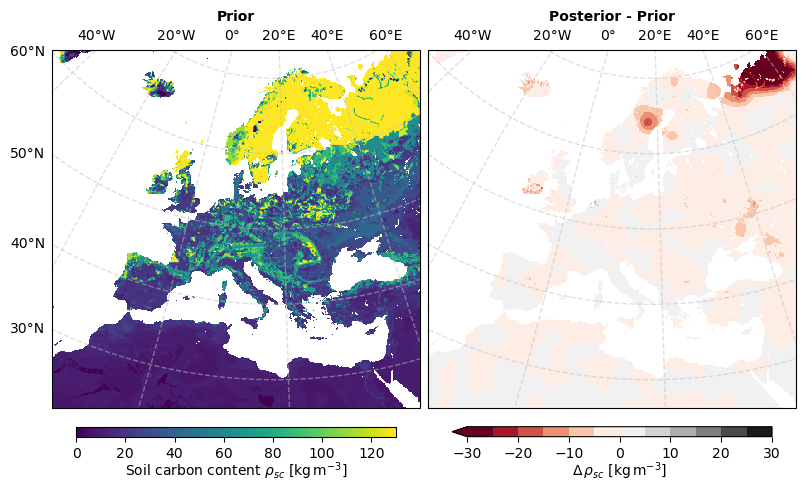

In [185]:
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_axes([0.06, 0.07, 0.46, 0.95],projection=proj)
ax2 = fig.add_axes([0.53, 0.07, 0.46, 0.95],projection=proj)
cax1 = fig.add_axes([0.09, 0.13, 0.4, 0.02])
cax2 = fig.add_axes([0.56, 0.13, 0.4, 0.02])


ax1.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
om = surffile_prior['ORGANIC'][0,:,:].values
om[~grid['background']] = np.nan
cmesh1 = ax1.pcolormesh(grid['lon_c'],grid['lat_c'],
               om,cmap=plt.cm.viridis,
              transform=ccrs.PlateCarree())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl.right_labels=False
gl.bottom_labels = False
ax1.set_title('Prior',weight="bold",fontsize=10)

cbar1 = plt.colorbar(cmesh1,cax=cax1,orientation='horizontal')
cbar1.set_label(r'Soil carbon content $\rho_{sc}$ [kg$\,$m$^{-3}$]',labelpad=0)


ax2.pcolormesh(grid['lon_c'],grid['lat_c'],grid['background'],cmap=plt.cm.Greys,vmax=3,transform=ccrs.PlateCarree())
om2 = surffile_5iter['ORGANIC'][0,:,:].values
om2[~grid['background']] = np.nan
delta_om = om2-om

cmap=plt.cm.RdGy
max_ = 30#int(np.nanmax(np.abs(delta_sand)))
n_ = 12+1
norm = mpl.colors.BoundaryNorm( np.linspace(-max_,max_,n_), cmap.N)

# vmax = np.nanmax(np.abs(delta_sand))
cmesh2 = ax2.pcolormesh(grid['lon_c'],grid['lat_c'],
               delta_om,cmap=cmap,norm=norm,
              transform=ccrs.PlateCarree())
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.left_labels=False
gl2.bottom_labels = False
gl2.right_labels=False
ax2.set_title('Posterior - Prior',weight="bold",fontsize=10)

cbar2 = plt.colorbar(cmesh2,cax=cax2,orientation='horizontal',extend='min')
cbar2.set_label(r'$\Delta\,\rho_{sc}$ [kg$\,$m$^{-3}$]',labelpad=0)

fig.savefig(os.path.join(dir_figs_texture,'texture_om.png'))
fig.savefig(os.path.join(dir_figs_texture,'texture_om.pdf'))

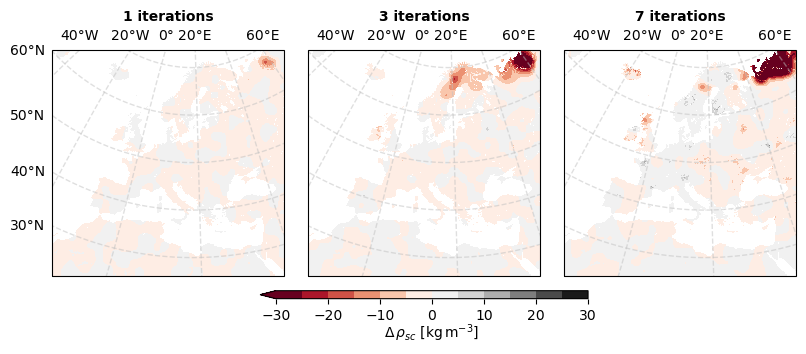

In [177]:
om3 = surffile_3iter['ORGANIC'][0,:,:].values
om3[~grid['background']] = np.nan
delta_om3 = om3-om

om4 = surffile_1iter['ORGANIC'][0,:,:].values
om4[~grid['background']] = np.nan
delta_om4 = om4-om

om5 = surffile_7iter['ORGANIC'][0,:,:].values
om5[~grid['background']] = np.nan
delta_om5 = om5-om

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_axes([0.06, 0.12, 0.29, 0.70],projection=proj)
ax2 = fig.add_axes([0.38, 0.12, 0.29, 0.70],projection=proj)
ax3 = fig.add_axes([0.70, 0.12, 0.29, 0.70],projection=proj)

cax1 = fig.add_axes([0.32, 0.13, 0.41, 0.02])


cmap=plt.cm.RdGy
max_ = 30#int(np.nanmax(np.abs(delta_sand)))
n_ = 12+1
norm = mpl.colors.BoundaryNorm( np.linspace(-max_,max_,n_), cmap.N)

# vmax = np.nanmax(np.abs(delta_sand))
cmesh1 = ax1.pcolormesh(grid['lon_c'],grid['lat_c'],
               delta_om4,cmap=cmap,norm=norm,
              transform=ccrs.PlateCarree())
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl1.right_labels=False
gl1.bottom_labels = False
ax1.set_title('1 iterations',weight="bold",fontsize=10)


cmesh2 = ax2.pcolormesh(grid['lon_c'],grid['lat_c'],
               delta_om3,cmap=cmap,norm=norm,
              transform=ccrs.PlateCarree())
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.right_labels=False
gl2.bottom_labels = False
gl2.left_labels=False
ax2.set_title('3 iterations',weight="bold",fontsize=10)


cmesh3 = ax3.pcolormesh(grid['lon_c'],grid['lat_c'],
               delta_om5,cmap=cmap,norm=norm,
              transform=ccrs.PlateCarree())
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl3.right_labels=False
gl3.bottom_labels = False
gl3.left_labels=False
ax3.set_title('7 iterations',weight="bold",fontsize=10)


cbar1 = plt.colorbar(cmesh1,cax=cax1,orientation='horizontal',extend='min')
cbar1.set_label(r'$\Delta\,\rho_{sc}$ [kg$\,$m$^{-3}$]',labelpad=0)

fig.savefig('figures/om_per_iter.png')
fig.savefig('figures/om_per_iter.pdf')

# Soil moisture - prior and posterior

In [204]:
data_1_1 = xr.open_dataset('/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/20190101-20191230/i005/R063/run_20190101-20191230/EU11.clm2.h0.2019-05-01-72000.nc')
data_1_2 = xr.open_dataset('/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/20190101-20191230/i005/R063/run_20190101-20191230/EU11.clm2.h0.2019-05-16-72000.nc')
data_1_3 = xr.open_dataset('/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/20190101-20191230/i005/R063/run_20190101-20191230/EU11.clm2.h0.2019-06-03-72000.nc')

 
dir_figs_sm_times =os.path.join(folder_results,'figures/05_sm_snapshots')
if not os.path.exists(dir_figs_sm_times):
    print('making %s' % dir_figs_sm_times)
    os.makedirs(dir_figs_sm_times)

making /p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/figures/05_sm_snapshots


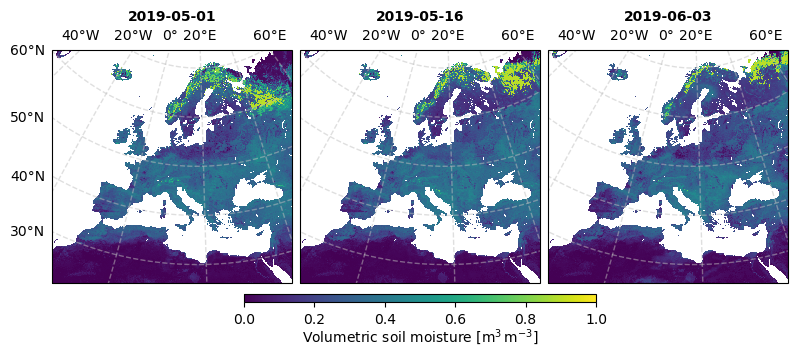

In [205]:
eCLM_dz = np.array([0.02,0.04,0.06,0.08,0.120,
                    0.160,0.200,0.240,0.280,0.320,
                    0.360,0.400,0.440,0.540,0.640,
                    0.740,0.840,0.940,1.040,1.140,
                    2.390,4.676,7.635,11.140,15.115])

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_axes([0.06, 0.12, 0.30, 0.70],projection=proj)
ax2 = fig.add_axes([0.37, 0.12, 0.30, 0.70],projection=proj)
ax3 = fig.add_axes([0.68, 0.12, 0.30, 0.70],projection=proj)

cax1 = fig.add_axes([0.30, 0.13, 0.44, 0.02])
cmap = plt.get_cmap('viridis').copy()
cmap.set_extremes(under='k', over='r')
    
SM = data_1_1.SOILLIQ[0]/(eCLM_dz[0:20,np.newaxis,np.newaxis]*1000)    
cmesh1 = ax1.pcolormesh(grid['lon_c'],grid['lat_c'],
               SM[0],cmap=cmap,vmin=0.,vmax=1.,
              transform=ccrs.PlateCarree())
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl1.right_labels=False
gl1.bottom_labels = False
ax1.set_title('2019-05-01',weight="bold",fontsize=10)

SM = data_1_2.SOILLIQ[0]/(eCLM_dz[0:20,np.newaxis,np.newaxis]*1000)    
cmesh2 = ax2.pcolormesh(grid['lon_c'],grid['lat_c'],
               SM[0],cmap=cmap,vmin=0.,vmax=1.,
              transform=ccrs.PlateCarree())
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.right_labels=False
gl2.bottom_labels = False
gl2.left_labels=False
ax2.set_title('2019-05-16',weight="bold",fontsize=10)

SM = data_1_3.SOILLIQ[0]/(eCLM_dz[0:20,np.newaxis,np.newaxis]*1000)    
cmesh3 = ax3.pcolormesh(grid['lon_c'],grid['lat_c'],
               SM[0],cmap=cmap,vmin=0.,vmax=1.,
              transform=ccrs.PlateCarree())
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl3.right_labels=False
gl3.bottom_labels = False
gl3.left_labels=False
ax3.set_title('2019-06-03',weight="bold",fontsize=10)

cbar1 = plt.colorbar(cmesh1,cax=cax1,orientation='horizontal')
cbar1.set_label(r'Volumetric soil moisture [m$^3\,$m$^{-3}$]',labelpad=0)

fig.savefig(os.path.join(dir_figs_sm_times,'sm_snapshots_prior.png'))
fig.savefig(os.path.join(dir_figs_sm_times,'sm_snapshots_prior.pdf'))


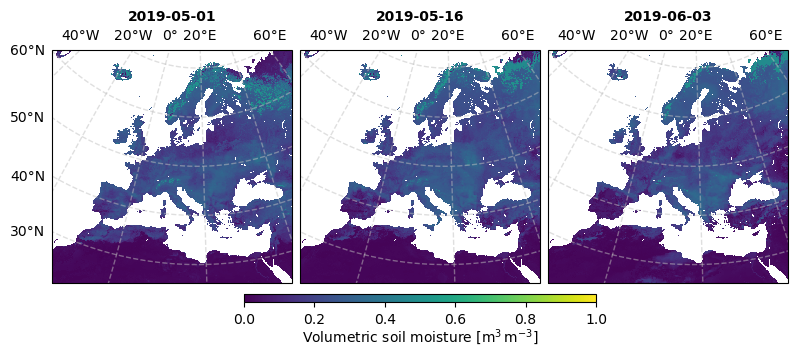

In [206]:
data_1_1 = xr.open_dataset('/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/20190101-20191230/i005/R000/run_20190101-20191230/EU11.clm2.h0.2019-05-01-72000.nc')
data_1_2 = xr.open_dataset('/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/20190101-20191230/i005/R000/run_20190101-20191230/EU11.clm2.h0.2019-05-16-72000.nc')
data_1_3 = xr.open_dataset('/p/scratch/cjibg36/kaandorp2/TSMP_results/eTSMP/DA_eCLM_cordex_444x432_v14_1y_iter5/20190101-20191230/i005/R000/run_20190101-20191230/EU11.clm2.h0.2019-06-03-72000.nc')


fig = plt.figure(figsize=(8,4))

ax1 = fig.add_axes([0.06, 0.12, 0.30, 0.70],projection=proj)
ax2 = fig.add_axes([0.37, 0.12, 0.30, 0.70],projection=proj)
ax3 = fig.add_axes([0.68, 0.12, 0.30, 0.70],projection=proj)

cax1 = fig.add_axes([0.30, 0.13, 0.44, 0.02])
cmap = plt.get_cmap('viridis').copy()
cmap.set_extremes(under='k', over='r')
    
SM = data_1_1.SOILLIQ[0]/(eCLM_dz[0:20,np.newaxis,np.newaxis]*1000)    
cmesh1 = ax1.pcolormesh(grid['lon_c'],grid['lat_c'],
               SM[0],cmap=cmap,vmin=0.,vmax=1.,
              transform=ccrs.PlateCarree())
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl1.right_labels=False
gl1.bottom_labels = False
ax1.set_title('2019-05-01',weight="bold",fontsize=10)

SM = data_1_2.SOILLIQ[0]/(eCLM_dz[0:20,np.newaxis,np.newaxis]*1000)    
cmesh2 = ax2.pcolormesh(grid['lon_c'],grid['lat_c'],
               SM[0],cmap=cmap,vmin=0.,vmax=1.,
              transform=ccrs.PlateCarree())
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl2.right_labels=False
gl2.bottom_labels = False
gl2.left_labels=False
ax2.set_title('2019-05-16',weight="bold",fontsize=10)

SM = data_1_3.SOILLIQ[0]/(eCLM_dz[0:20,np.newaxis,np.newaxis]*1000)    
cmesh3 = ax3.pcolormesh(grid['lon_c'],grid['lat_c'],
               SM[0],cmap=cmap,vmin=0.,vmax=1.,
              transform=ccrs.PlateCarree())
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='silver', alpha=0.5, linestyle='--', y_inline=False,x_inline=False,draw_labels=True)
gl3.right_labels=False
gl3.bottom_labels = False
gl3.left_labels=False
ax3.set_title('2019-06-03',weight="bold",fontsize=10)

cbar1 = plt.colorbar(cmesh1,cax=cax1,orientation='horizontal')
cbar1.set_label(r'Volumetric soil moisture [m$^3\,$m$^{-3}$]',labelpad=0)

fig.savefig(os.path.join(dir_figs_sm_times,'sm_snapshots_post.png'))
fig.savefig(os.path.join(dir_figs_sm_times,'sm_snapshots_post.pdf'))
